<a href="https://colab.research.google.com/github/ruhmmachaudhary-rgb/Reddit_NLP_Project/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reddit Subreddit Post Classification

#### 1-importing libraries

In [ ]:
!pip install clean-text        # For cleaning and preprocessing text
!pip install Unidecode         # For converting Unicode text to ASCII
!pip install nltk              # Natural Language Toolkit - used for tokenization, stopwords, POS tagging, etc.
!pip install gensim keras      # Gensim: For Word2Vec embeddings; Keras: For building and training deep learning models (RNN, LSTM, etc.)

In [ ]:
import pandas as pd
import numpy as np     # manually define wxh ,whh, bh etc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# rnn libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


# Surpass warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read csv
df = pd.read_csv('/content/reddit_posts_and_comments(in).csv')
df.head() # displaying first five rows
#number of rows and colmns
print(df.shape)


(5708, 11)


#### 2- select relative colmns

In [ ]:
# Select only the relevant columns
df = df[['post_text', 'subreddit']]
# printing the names
print(df.columns)
# printing the colmns
df.head()

Index(['post_text', 'subreddit'], dtype='object')


,post_text,subreddit
0,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning
1,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning
2,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning
3,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning
4,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning


### select subreddit classes

In [ ]:
# Filter only the 3 required subreddit classes
target_subreddits = ['Alzheimers', 'povertyfinance', 'GetMotivated']
df = df[df['subreddit'].isin(target_subreddits)]

df = df[df['subreddit'].isin(['Alzheimers', 'povertyfinance', 'GetMotivated'])].copy()

# Preview
subreddit_counts=df['subreddit'].value_counts()
df

,post_text,subreddit
1548,Two years ago I posted the following message o...,povertyfinance
1549,Two years ago I posted the following message o...,povertyfinance
1550,Two years ago I posted the following message o...,povertyfinance
1551,Two years ago I posted the following message o...,povertyfinance
1552,Two years ago I posted the following message o...,povertyfinance
...,...,...
5551,Hello everyone! I will try to keep this short ...,Alzheimers
5552,Hello everyone! I will try to keep this short ...,Alzheimers
5553,Hello everyone! I will try to keep this short ...,Alzheimers
5554,Hello everyone! I will try to keep this short ...,Alzheimers


### 4-visualiozation (bar chart) using matplot

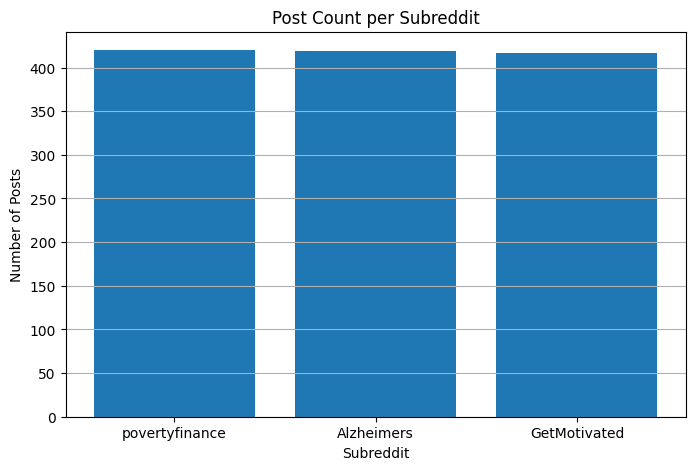

In [ ]:
# Plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(subreddit_counts.index, subreddit_counts.values)
plt.title('Post Count per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.grid(True, axis='y')
plt.show()

from seaborn for prettier look

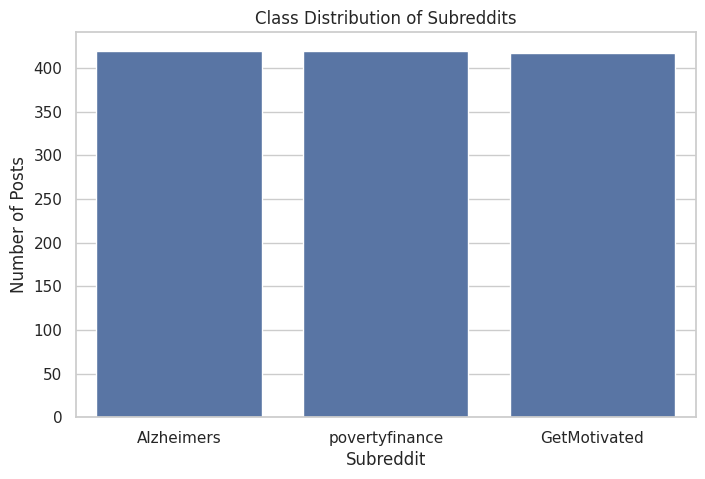

In [ ]:
import seaborn as sns
# Optional: set style
sns.set(style="whitegrid")

# Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='subreddit', order=['Alzheimers', 'povertyfinance', 'GetMotivated'])
plt.title('Class Distribution of Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.show()


### 5-: Handle Null Values

In [ ]:
# chechking missing values
print(df.isnull().sum())



post_text    146
subreddit      0
dtype: int64


In [ ]:

df['post_text'].fillna('unknown', inplace=True)
#df['subreddit'].fillna('Alzheimers', inplace=True)



In [ ]:
# Final check (no nulls should remain)
print(df.isnull().sum())
df.head()

post_text    0
subreddit    0
dtype: int64


,post_text,subreddit
1548,Two years ago I posted the following message o...,povertyfinance
1549,Two years ago I posted the following message o...,povertyfinance
1550,Two years ago I posted the following message o...,povertyfinance
1551,Two years ago I posted the following message o...,povertyfinance
1552,Two years ago I posted the following message o...,povertyfinance


In [ ]:
# First install the package (in notebook or terminal)
!pip install clean-text


# **text processing**

### 6- text cleaning

In [ ]:
from cleantext import clean

# Clean the text
df['post_text'] = df['post_text'].apply(lambda x: clean(
    x,
    lower=True,
    no_punct=True,
    no_numbers=True,
    no_urls=True,
    no_emoji=True,
    no_digits=True,
    replace_with_url="",
    replace_with_email="",
    replace_with_phone_number="",
    replace_with_digit="<digit>",
    replace_with_punct="",
    lang="en"

    ))
df['post_text'].head()



,post_text
1548,two years ago i posted the following message o...
1549,two years ago i posted the following message o...
1550,two years ago i posted the following message o...
1551,two years ago i posted the following message o...
1552,two years ago i posted the following message o...


### 7.	Remove Stopwords

In [ ]:
import nltk

from nltk.corpus import stopwords
# Download stopwords (run once)
nltk.download('stopwords')

# remove words with legnth less the oe eqaul to 2
df['post_text'] = df['post_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['post_text'] = df['post_text'].apply(remove_stopwords)

df['post_text'].head()
df['post_text'].sample(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,post_text
1945,dog licking paws lot course ive done research ...
4469,unknown
5177,parents married <number> years currently <numb...
1649,unpaid apprenticeship spent savings entry leve...
4658,recently read study proved focusing one habit ...
5533,researched prion disease contagion mechanisms ...
4593,unknown
5354,true wondering true others site andor anyone s...
1877,wondering anyone home warranty american home s...
4517,unknown


### 8.	Tokenization

In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['post_text'] = df['post_text'].apply(word_tokenize)
df['post_text'].head()

,post_text
1548,"[two, years, ago, posted, following, message, ..."
1549,"[two, years, ago, posted, following, message, ..."
1550,"[two, years, ago, posted, following, message, ..."
1551,"[two, years, ago, posted, following, message, ..."
1552,"[two, years, ago, posted, following, message, ..."


#label encoding

### 9-Encode Target Labels



In [ ]:
# Step 1: Create encoder
encoder = LabelEncoder()

# Step 2: Fit and transform the 'subreddit' column
df['subreddit'] = encoder.fit_transform(df['subreddit'])

# Step 3: Print to see result
df['subreddit'].head()
df.head()

# Optional: See which subreddit got which number
#print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


,post_text,subreddit
1548,"[two, years, ago, posted, following, message, ...",2
1549,"[two, years, ago, posted, following, message, ...",2
1550,"[two, years, ago, posted, following, message, ...",2
1551,"[two, years, ago, posted, following, message, ...",2
1552,"[two, years, ago, posted, following, message, ...",2


In [ ]:
# duplicate checking
# Check duplicates in the 'post_text' column
text_duplicates = df[df.duplicated(subset='post_text')]
print("Duplicate post_text entries:", text_duplicates.shape[0])

df.head()



Duplicate post_text entries: 1016


,post_text,subreddit
1548,"[two, years, ago, posted, following, message, ...",2
1549,"[two, years, ago, posted, following, message, ...",2
1550,"[two, years, ago, posted, following, message, ...",2
1551,"[two, years, ago, posted, following, message, ...",2
1552,"[two, years, ago, posted, following, message, ...",2


In [ ]:
# pip install nlpaug


In [ ]:
# # Step 1: Install nlpaug and nltk if not already installed
# # !pip install nlpaug nltk

# # Step 2: Import libraries
# import nltk
# import nlpaug.augmenter.word as naw

# # Step 3: Download required NLTK data
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')
# #nltk.download('averaged_perceptron_tagger_eng')  # Some systems require this

In [ ]:

# # Load your dataset
# df = pd.read_csv('/content/reddit_posts_and_comments(in).csv')

# # Initialize augmenter
# aug = naw.SynonymAug(aug_src='wordnet')

# # Keep augmenting until no duplicates remain
# while df.duplicated('post_text').sum() > 0:
#     for i in df[df.duplicated('post_text')].index:
#         try:
#             df.at[i, 'post_text'] = aug.augment(df.at[i, 'post_text'])[0]
#         except:
#             pass  # skip if augmentation fails

# # Final check
# print("Duplicates removed:", df.duplicated('post_text').sum() == 0)

# # Preview
# print(df.head())


In [ ]:
#df.head()

#### splitting the dataset into training and testing

In [ ]:
# Features and labels
X = df['post_text']  # NumPy array from pad_sequences
y = df['subreddit']  # Target variable

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify for balanced class distribution
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1004,)
Test set shape: (252,)


# vectorization

### TF-IDF (for classical model )

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['post_text'] = df['post_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)  # list of word-to string

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['post_text'])

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

print("TF-IDF Vector shape:", X_tfidf.shape)
print("feature names:",feature_names)


TF-IDF Vector shape: (1256, 5633)
feature names: ['aaju' 'aaro' 'abbreviated' ... 'zero' 'zombie' 'zone']


### (b)	Word2Vec
●	Train a Word2Vec model using gensim on the tokenized text.

●	Build a word index and an embedding matrix.

●	Convert each post into a sequence of integers using the word index.

●	Use pad_sequences from Keras to ensure uniform input length.

In [ ]:
!pip install gensim


In [ ]:
from gensim.models import Word2Vec

In [ ]:
from gensim.models import Word2Vec
from keras.preprocessing.sequence import pad_sequences
import numpy as np
# Step 1: Tokenize and clean
tokenized_posts = df['post_text'].dropna().astype(str).apply(lambda x: x.split())
tokenized_posts = tokenized_posts[tokenized_posts.apply(lambda x: len(x) > 0)]    # Removes any empty token lists (posts that were blank or only whitespace).

# Step 2: Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized_posts.tolist(), vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Word index
word_index = {word: i + 1 for i, word in enumerate(w2v_model.wv.index_to_key)}

# Step 4: Embedding matrix
embedding_dim = w2v_model.vector_size
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_matrix[i] = w2v_model.wv[word]

# Step 5: Convert to sequences
post_sequences = tokenized_posts.apply(lambda tokens: [word_index.get(word, 0) for word in tokens])    # Converts each tokenized post into a sequence of integers

# Step 6: Pad sequences
max_len = 100
padded_sequences = pad_sequences(post_sequences, maxlen=max_len, padding='post', truncating='post')   #ensure all sequences have the same length

# Output
print("Word Index Sample:", dict(list(word_index.items())[:10]))
print("Embedding Matrix Shape:", embedding_matrix.shape)
print("Padded Sequences Shape:", padded_sequences.shape)


Word Index Sample: {'<': 1, '>': 2, 'number': 3, 'digit': 4, 'like': 5, 'dont': 6, 'get': 7, 'time': 8, 'know': 9, 'even': 10}
Embedding Matrix Shape: (5650, 100)
Padded Sequences Shape: (1256, 100)


## Model Building
####11.	Split the Dataset
● Use train_test_split to divide data into training and test sets (80/20 split).


In [ ]:
"""
      splitting before vectorization to get better result
      data split and train accordingly
"""


'\n      splitting before vectorization to get better result\n      data split and train accordingly\n'

### 12.	Build and Train the Models Train Logistic Regression using TF-IDF.

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



### load and prepare data

In [ ]:
# Drop rows with nulls
df = df.dropna(subset=['post_text', 'subreddit'])

# Define features and labels
X = df['post_text']
y = df['subreddit']


TF-IDF vactorization

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)


Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


Train Logistic Regression Model

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

 Evaluate the Model

In [ ]:
y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9325396825396826

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.83      1.00      0.91        84
           2       1.00      0.85      0.92        84

    accuracy                           0.93       252
   macro avg       0.94      0.93      0.93       252
weighted avg       0.94      0.93      0.93       252



training accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = lr_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9631474103585658


testing accuracy

In [ ]:
# Predict on testing data
y_test_pred = lr_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.9325396825396826


#	RNN

In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
# === Load and preprocess your dataset ===
# Assuming your DataFrame is named df with 'post_text' and 'subreddit'
df = df.dropna(subset=['post_text', 'subreddit'])  # remove missing
texts = df['post_text'].astype(str).tolist()
labels = df['subreddit'].tolist()

# === Tokenization and padding ===
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)  # Converts each text into a list of integers
word_index = tokenizer.word_index    # mapping each word to its unique integer index.
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)

# === Word2Vec training ===
w2v_model = Word2Vec(sentences=[text.split() for text in texts],
                     vector_size=100, window=5, min_count=1)

# === Embedding matrix ===
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# === Label encoding ===
le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y)   # Converts integer labels into one-hot encoded vectors.

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# === RNN Model ===
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True))
model.add(SimpleRNN(64))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   # suitable for multi-class classification.

# === Training ===
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, batch_size=32)

# === Evaluation ===
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.4760 - loss: 1.0592 - val_accuracy: 0.7698 - val_loss: 0.7318
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8643 - loss: 0.5747 - val_accuracy: 0.9563 - val_loss: 0.2013
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9531 - loss: 0.1533 - val_accuracy: 0.9643 - val_loss: 0.1354
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9339 - loss: 0.1896 - val_accuracy: 0.8968 - val_loss: 0.2011
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9437 - loss: 0.1549 - val_accuracy: 0.9722 - val_loss: 0.1239
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9572 - loss: 0.1225 - val_accuracy: 0.9722 - val_loss: 0.1144
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9482 - loss: 0.1143 - val_accuracy: 0.9722 - val_loss: 0.1085
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9469 - loss: 0.1309 - val_accuracy: 0.9722 - v

# lstm

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# === Load and preprocess your dataset ===
# Assuming df has columns: 'post_text' and 'subreddit'
df = df.dropna(subset=['post_text', 'subreddit'])
texts = df['post_text'].astype(str).tolist()
labels = df['subreddit'].tolist()

# === Tokenization and padding ===
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)

# === Train Word2Vec ===
w2v_model = Word2Vec(sentences=[text.split() for text in texts],
                     vector_size=100, window=5, min_count=1)

# === Embedding matrix ===
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# === Label encoding ===
le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y)

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# === Define LSTM model ===
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(y.shape[1], activation='softmax'))

# === Compile the model ===
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# === EarlyStopping callback ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# === Train the model ===
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=20,
          batch_size=32,
          callbacks=[early_stop])

# === Evaluate ===
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.3454 - loss: 1.1043 - val_accuracy: 0.4802 - val_loss: 1.0595
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4659 - loss: 1.0552 - val_accuracy: 0.4881 - val_loss: 1.0217
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4507 - loss: 1.0417 - val_accuracy: 0.5079 - val_loss: 0.9796
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4673 - loss: 1.0134 - val_accuracy: 0.6071 - val_loss: 0.9587
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5194 - loss: 1.0065 - val_accuracy: 0.5833 - val_loss: 1.0003
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4857 - loss: 1.0080 - val_accuracy: 0.5714 - val_loss: 0.9888
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4790 - loss: 1.0229 - val_accuracy: 0.5238 - val_loss: 0.9652
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5838 - loss: 0.9730
Test Accuracy: 0.6071428656578064


# Model Evaluation

### 13. Evaluate Performance
● Generate and display:

○ Classification Report (Precision, Recall, F1-Score)

○ Confusion Matrix



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.74      0.60        84
           1       0.68      0.55      0.61        84
           2       0.71      0.54      0.61        84

    accuracy                           0.61       252
   macro avg       0.63      0.61      0.61       252
weighted avg       0.63      0.61      0.61       252



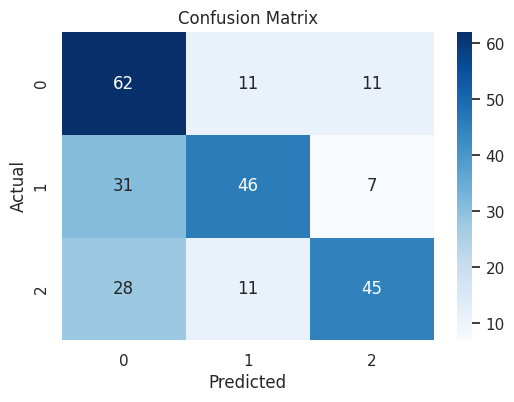

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels
y_pred = model.predict(X_test)

# For neural networks with softmax output
import numpy as np
if y_pred.ndim > 1 and y_pred.shape[1] > 1:
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    y_pred_classes = (y_pred > 0.5).astype(int) # assigns 1 if probability > 0.5, else 0

# If labels were one-hot encoded or categorical, convert y_test to class indices
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# === Classification Report ===
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# === Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Build a Streamlit App
### 14. Create an Interactive Interface Build a Streamlit web app to:
●	Display a sample of the dataset

●	Visualize class distribution

●	Explain your preprocessing pipeline

●	Allow user to input a Reddit post and predict its subreddit

● Show model performance metrics


In [ ]:
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample data
texts = [
    "I love football",
    "Python programming rocks",
    "My cat is cute",
    "I watch movies",
]
labels = ["sports", "programming", "pets", "movies"]

# Train TF-IDF + model
vectorizer = TfidfVectorizer()   #initializes the vectorizer
X = vectorizer.fit_transform(texts)  # transforms the texts into numerical feature
model = MultinomialNB()
model.fit(X, labels)

# Prediction function
def predict(text):
    vec = vectorizer.transform([text])
    prediction = model.predict(vec)[0]
    return f"Predicted category: {prediction}"

# Gradio interface
gr.Interface(fn=predict, inputs="text", outputs="text", title="Simple Text Classifier").launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://340356bd2f06a7a59a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
